In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)
import math

In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [5]:
# the above statement can also be written as 
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'],axis = 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# drop na values because dataframe is big enough (alternatively we can replace the na values  by median)
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3.shape

(13246, 5)

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

#### 4 bedroom and 4 BHK are essentially the same so let's fix this

In [11]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Kunal Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df3.head()


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3 = df3.drop(['size'], axis = 1)
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [14]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df3[df3['bhk'] > 20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [16]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

##### "1133 - 1384" now this an range rather than a single value

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df3[ ~ df3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


So there are a lot of impurity in this dataset. Let's clean them

In [19]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if(len(tokens) == 2):
        return ( float(tokens[0]) + float(tokens[1]) )/2
    try:
        return float(x)
    except:
        return None

In [20]:
convert_sqft_to_num('2120')

2120.0

In [21]:
convert_sqft_to_num('2120-2130')

2125.0

In [22]:
convert_sqft_to_num('34.46Sq. Meter')
#so it returns nothing

In [23]:
df4 = df3.copy()

In [24]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [25]:
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [26]:
df4.loc[30,:]

location      Yelahanka
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [27]:
df5 = df4.copy()

In [28]:
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']

In [29]:
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [30]:
df5['location'].nunique()

1304

In [31]:
df5['location'] = df5['location'].apply(lambda x: x.strip())
# to remove extra spaces

In [32]:
# to find count per location
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

So we can see many locations have only 1 data point so we can assign those locations which are below a given threshold to be counted as "others"

In [33]:
print(location_stats[location_stats <= 10])

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64


So we have 1052 locations which have datapoints less than or equal to our threshold(10) out of 1293

In [34]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [35]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [36]:
df5['location'].nunique()
# so now only 242 unique locations

242

In [37]:
df5.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


### Outlier Removal

In [38]:
df5['sqft_per_bhk'] = df5['total_sqft'] / df5['bhk']

In [39]:
df5.shape

(13246, 7)

In [40]:
df5['sqft_per_bhk'].describe()

count    13200.000000
mean       573.847262
std        388.079980
min          0.250000
25%        473.000000
50%        552.000000
75%        625.000000
max      26136.000000
Name: sqft_per_bhk, dtype: float64

In [41]:
threshold = 300
df5[df5['sqft_per_bhk'] < threshold]

,location,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk
9,other,1020.0,6.0,370.0,6,36274.509804,170.000000
45,HSR Layout,600.0,9.0,200.0,8,33333.333333,75.000000
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810,234.500000
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296,168.750000
70,other,500.0,3.0,100.0,3,20000.000000,166.666667
...,...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571,200.000000
13279,other,1200.0,5.0,130.0,6,10833.333333,200.000000
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091,275.000000
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649,154.800000


In [42]:
df6 = df5[df5['sqft_per_bhk'] >= threshold]
df6.shape

(12456, 7)

In [43]:
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [44]:
def remove_outliers(df, attribute):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf[attribute])
        std = np.std(subdf[attribute])
        reduced_df = subdf[ (subdf[attribute] > (m - std)) & (subdf[attribute] <= (m + std) ) ]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out


In [45]:
df7 = remove_outliers(df6, 'price_per_sqft')
df7.shape

(10241, 7)

In [46]:
df7[df7['location'] == 'Rajaji Nagar']

,location,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk
5725,Rajaji Nagar,1640.0,3.0,229.0,3,13963.414634,546.666667
5726,Rajaji Nagar,2390.0,3.0,415.0,3,17364.016736,796.666667
5727,Rajaji Nagar,2390.0,3.0,410.0,3,17154.811715,796.666667
5728,Rajaji Nagar,1725.0,3.0,200.0,3,11594.202899,575.000000
5729,Rajaji Nagar,3516.0,4.0,540.0,4,15358.361775,879.000000
...,...,...,...,...,...,...,...
5790,Rajaji Nagar,2367.0,3.0,320.0,3,13519.222645,789.000000
5791,Rajaji Nagar,2409.0,3.0,395.0,3,16396.845164,803.000000
5792,Rajaji Nagar,1314.0,2.0,225.0,2,17123.287671,657.000000
5793,Rajaji Nagar,1440.0,2.0,165.0,2,11458.333333,720.000000


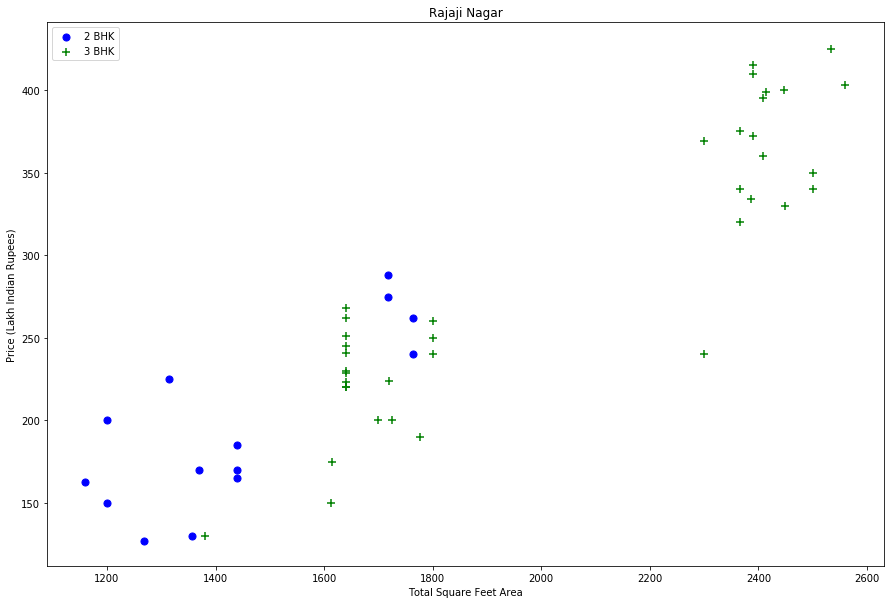

In [47]:
def plot_scatter(df,location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)

    plt.scatter(bhk2['total_sqft'], bhk2['price'], color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], marker = '+', color = 'green', label = '3 BHK', s = 50)
    # s : scalar or array_like, shape (n, ), optional
    # The marker size in points**2. Default is rcParams['lines.markersize'] ** 2
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter(df7, 'Rajaji Nagar')

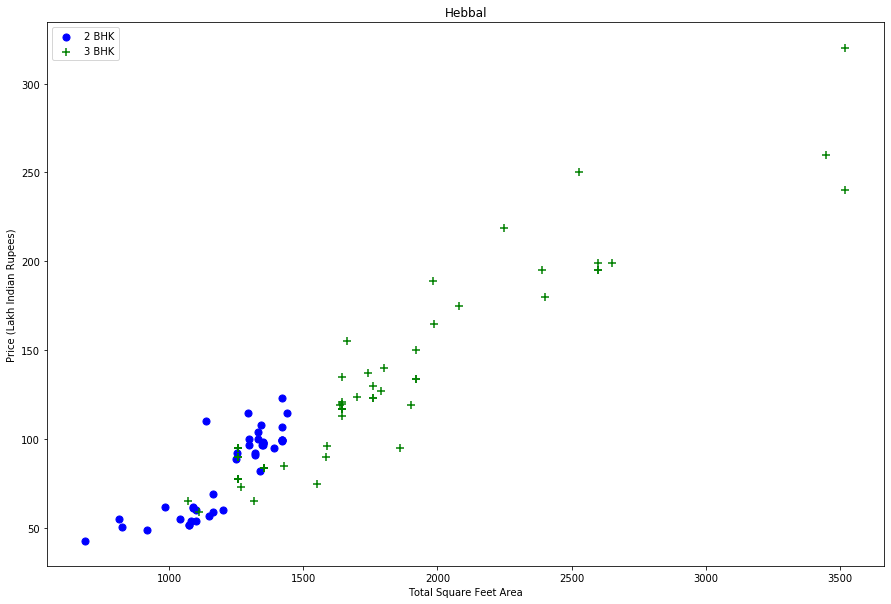

In [48]:
plot_scatter(df7, 'Hebbal')

So we see for some locations price of 2 bedrooms house is more than 3 bedroom house. This might be due to many reasons but we want to build a generic model so we will remove them.

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [49]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft'] < (stats['mean']) ].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8

,location,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,712.500000
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,543.333333
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,625.000000
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,400.000000
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668,617.500000
...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,5833.333333,600.000000
10233,other,1800.0,1.0,200.0,1,11111.111111,1800.000000
10236,other,1353.0,2.0,110.0,2,8130.081301,676.500000
10237,other,812.0,1.0,26.0,1,3201.970443,812.000000


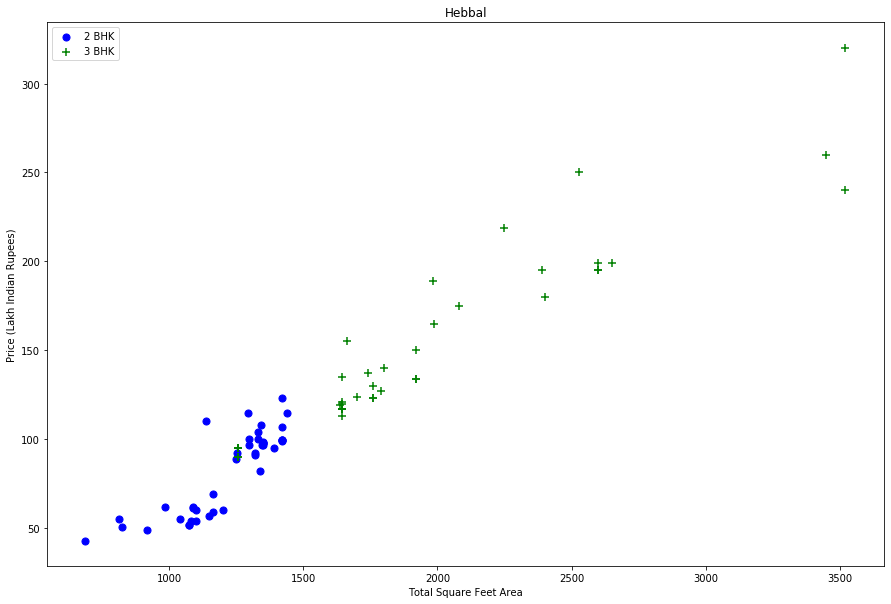

In [50]:
plot_scatter(df8, 'Hebbal')

So now as we can see those anomaly points are removed

Text(0, 0.5, 'count')

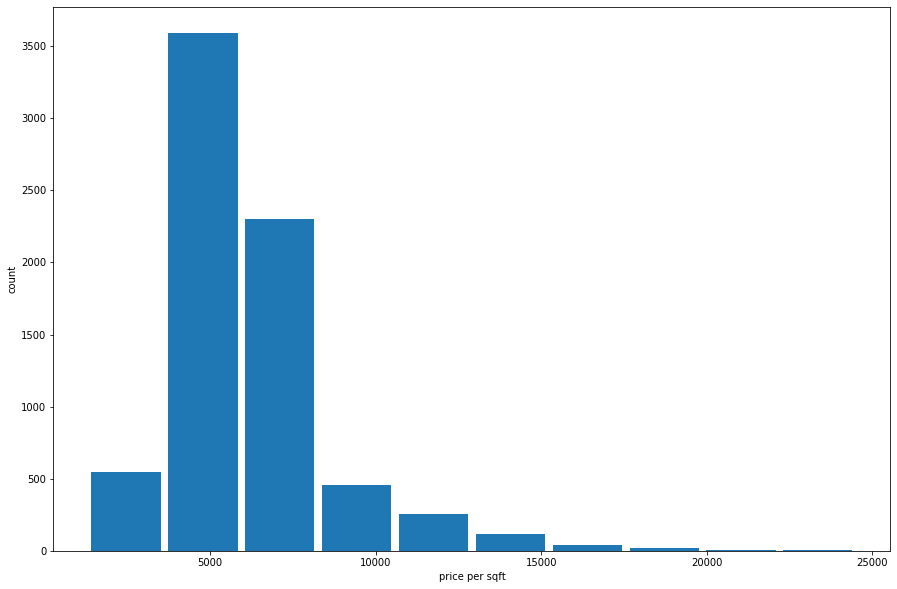

In [51]:
plt.hist(df8['price_per_sqft'], rwidth = 0.9)
plt.xlabel('price per sqft')
plt.ylabel('count')

In [52]:
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [53]:
df8[df8['bath'] > 10]

,location,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000,400.000000
8486,other,12000.0,12.0,525.0,10,4375.000000,1200.000000
8575,other,10000.0,16.0,550.0,16,5500.000000,625.000000
9308,other,6000.0,12.0,150.0,11,2500.000000,545.454545
9639,other,5425.0,13.0,275.0,13,5069.124424,417.307692


Text(0, 0.5, 'count')

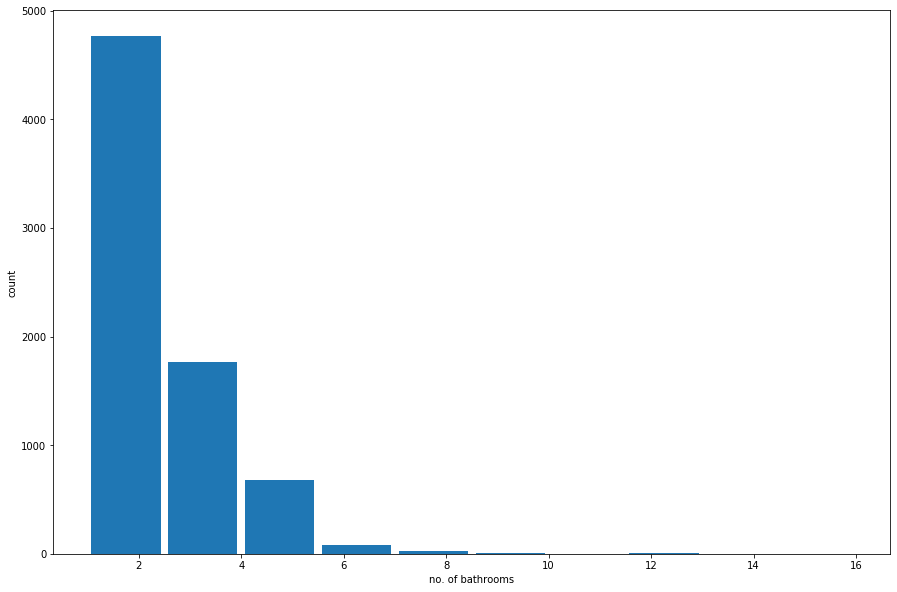

In [54]:
plt.hist(df8['bath'], rwidth = 0.9)
plt.xlabel('no. of bathrooms')
plt.ylabel('count')

So let's see it is unlikely to have 4 bathrooms in a 2bhk house. So we need to remove those outliers. So we select a criteria that if no. of bathrooms > bhk+2, they are outliers and we remove them 

In [55]:
df8[df8['bath'] > (df8['bhk'] + 2)]

,location,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520,615.000000
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429,1750.000000
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330,602.000000
8411,other,11338.0,9.0,1000.0,6,8819.897689,1889.666667


In [56]:
df9 = df8[df8['bath'] < (df8['bhk'] + 2)]
df9.shape

(7251, 7)

In [57]:
df10 = df9.drop(['price_per_sqft', 'sqft_per_bhk'], axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


We have cleaned the data, and now it's good enough for our use. Outlier removal process ends here.

Now let's proceed with building model

In [58]:
# one hot encoding the location data because our model cannot understand text data
dummies = pd.get_dummies(df10['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# we will concat dummies with df10. We will drop one column of dummies because to represent 'k' dummies we need  'k-1' variables
df11 = pd.concat([df10, dummies.drop('other', axis = 'columns')], axis = 'columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df12 = df11.drop(['location'], axis = 'columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X = df12.drop(['price'], axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
y = df12['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [64]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lr_clf.score(X_test, y_test)

0.8021721027533604

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2)

print(np.average(cross_val_score(LinearRegression(), X, y, cv = cv)))

0.8564832287449121


We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose



### Find best model using GridSearchCV


In [67]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [68]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.721605,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.



Test the model for few properties

In [69]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [70]:
np.where(X.columns == '2nd Phase Judicial Layout')[0][0]

5

In [71]:
def predict_price(location, sqft, bath, bhk):    
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    # since locations start from 4th column 
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [72]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

89.34947525899737

In [73]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

92.77054625473453

In [74]:
predict_price('Indira Nagar',1000, 2, 2)

181.84758509145973

In [75]:
predict_price('Indira Nagar',1000, 3, 3)

185.26865608719686

Export the tested model to a pickle file


In [76]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

Export location and column information to a file that will be useful later on in our prediction application


In [77]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

## Congrats and Thank You for making it to the end of the notebook.
#### Here's a cute doggo for ya

In [78]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "bonus doggo.jpg")